In [2]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [11]:
bp_file = '/data/data1/diabetes/EMR-data/PatPopulation.csv'
bp_file_p = '/data/data1/diabetes/EMR-data2/PatPopulation.csv'

In [12]:
data_pd = pd.read_csv(bp_file, sep='|')


In [13]:
data_pd.shape

(6212, 5)

In [14]:
data_pd.head()

,Deidentified_Pat_ID,Gender,Age,Ethnicity,PAT_RACE
0,ZZGTTHZ,Female,61,Not Hispanic or Latino,Caucasian/White
1,ZDGGTZZ,Male,55,Not Hispanic or Latino,Caucasian/White
2,ZHTKNGVH,Male,79,Not Hispanic or Latino,Caucasian/White
3,ZNGVZDKH,Female,34,Not Hispanic or Latino,Caucasian/White
4,ZTDDKN,Female,60,Not Hispanic or Latino,Caucasian/White


In [15]:
def gender_type(x):
    if x == 'Female':
        return 1

    elif x == 'Male':
        return 0
    else:
        print(x)
        return -1


def ethnicity_type(x):
    if x == 'Hispanic or Latino':
        return 2
    elif x == 'Not Hispanic or Latino':
        return 3
    else:
        return -1


def race_type(x):
    if x == ' African American/Black':
        return 1
    elif x == ' African American/Black, Caucasian/White':
        return 2
    elif x == ' American Indian or Alaskan Native':
        return 3
    elif x == ' American Indian or Alaskan Native, Caucasian/White':
        return 4
    elif x == ' African American/Black, Caucasian/White':
        return 5
    elif x == ' Asian':
        return 6
    elif x == ' Caucasian/White':
        return 7
    elif x == ' Caucasian/White, Declined':
        return 8
    elif x == ' Caucasian/White, Hispanic/Latino/White':
        return 9
    elif x == ' Hispanic/Latino/White':
        return 10
    elif x == ' Native Hawaiian':
        return 11
    elif x == ' Pacific Islander':
        return 12
    else:
        return -1

In [16]:
pd.Series(data_pd["PAT_RACE"].tolist()).sort_values().unique()

array([' African American/Black',
       ' African American/Black, Caucasian/White',
       ' American Indian or Alaskan Native',
       ' American Indian or Alaskan Native, Caucasian/White', ' Asian',
       ' Caucasian/White', ' Caucasian/White, Declined',
       ' Caucasian/White, Hispanic/Latino/White', ' Declined',
       ' Hispanic/Latino/White', ' Native Hawaiian', ' Pacific Islander',
       nan], dtype=object)

In [17]:
data_pd['gender1'] = data_pd['Gender'].apply(lambda x: gender_type(x))
data_pd['ethnicity1'] = data_pd['Ethnicity'].apply(lambda x: ethnicity_type(x))
data_pd['race1'] = data_pd['PAT_RACE'].apply(lambda x: race_type(x))

In [18]:
data_pd.head()

,Deidentified_Pat_ID,Gender,Age,Ethnicity,PAT_RACE,gender1,ethnicity1,race1
0,ZZGTTHZ,Female,61,Not Hispanic or Latino,Caucasian/White,1,3,7
1,ZDGGTZZ,Male,55,Not Hispanic or Latino,Caucasian/White,0,3,7
2,ZHTKNGVH,Male,79,Not Hispanic or Latino,Caucasian/White,0,3,7
3,ZNGVZDKH,Female,34,Not Hispanic or Latino,Caucasian/White,1,3,7
4,ZTDDKN,Female,60,Not Hispanic or Latino,Caucasian/White,1,3,7


In [19]:
data_pd.pivot_table(index=['gender1'], aggfunc='size')

gender1
0    2441
1    3771
dtype: int64

In [20]:
data_pd.pivot_table(index=['ethnicity1'], aggfunc='size')

ethnicity1
-1      77
 2      41
 3    6094
dtype: int64

In [21]:
data_pd.pivot_table(index=['race1'], aggfunc='size')

race1
-1       38
 1       11
 2        1
 3       34
 4        9
 6       44
 7     6066
 8        1
 9        1
 10       2
 11       3
 12       2
dtype: int64

In [23]:
len(data_pd), len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

(6212, 6212)

In [25]:
data_pd = data_pd[['Deidentified_Pat_ID', 'gender1', 'Age', 'ethnicity1', 'race1']]
data_pd.columns = ['Deidentified_Pat_ID', 'gender', 'age', 'ethnicity', 'race']
data_pd.to_csv(bp_file_p, index=False)

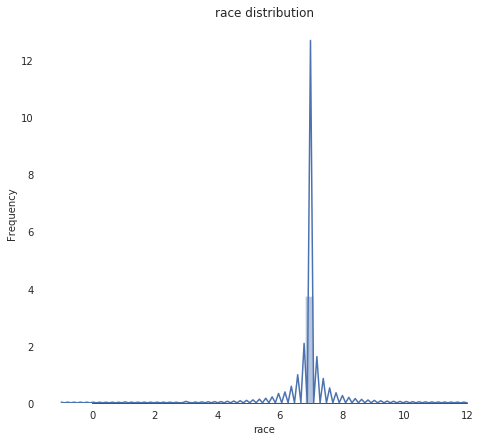

In [26]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(data_pd['race'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="race")
ax.set(title="race distribution")
sns.despine(trim=True, left=True)
plt.show()